<a href="https://colab.research.google.com/github/Mrunali178/Social_media_Analysis/blob/main/Socail_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Media/social_media_usage.csv')
df.head()

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21


Raw Data:


,App,User_Count,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,Facebook,136,33615,1295,13505,3144
1,Instagram,140,36974,1586,13859,3621
2,LinkedIn,147,34700,1496,14271,3687
3,Pinterest,140,33069,1488,12896,3471
4,Snapchat,156,40022,1560,14636,3979
5,TikTok,141,32912,1348,12889,3446
6,Twitter,140,36076,1496,12626,3350



App-Level Analytics:



,App,User_Count,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day,Engagement_Per_Post,Minutes_Per_Post,Total_Daily_Hours_Spent,Avg_Daily_Hrs_Spent_ByUser
0,Facebook,136,33615,1295,13505,3144,12.856371,25.957529,560.250000,4.119485
1,Instagram,140,36974,1586,13859,3621,11.021438,23.312736,616.233333,4.401667
2,LinkedIn,147,34700,1496,14271,3687,12.004011,23.195187,578.333333,3.934240
3,Pinterest,140,33069,1488,12896,3471,10.999328,22.223790,551.150000,3.936786
4,Snapchat,156,40022,1560,14636,3979,11.932692,25.655128,667.033333,4.275855
5,TikTok,141,32912,1348,12889,3446,12.117953,24.415430,548.533333,3.890307
6,Twitter,140,36076,1496,12626,3350,10.679144,24.114973,601.266667,4.294762


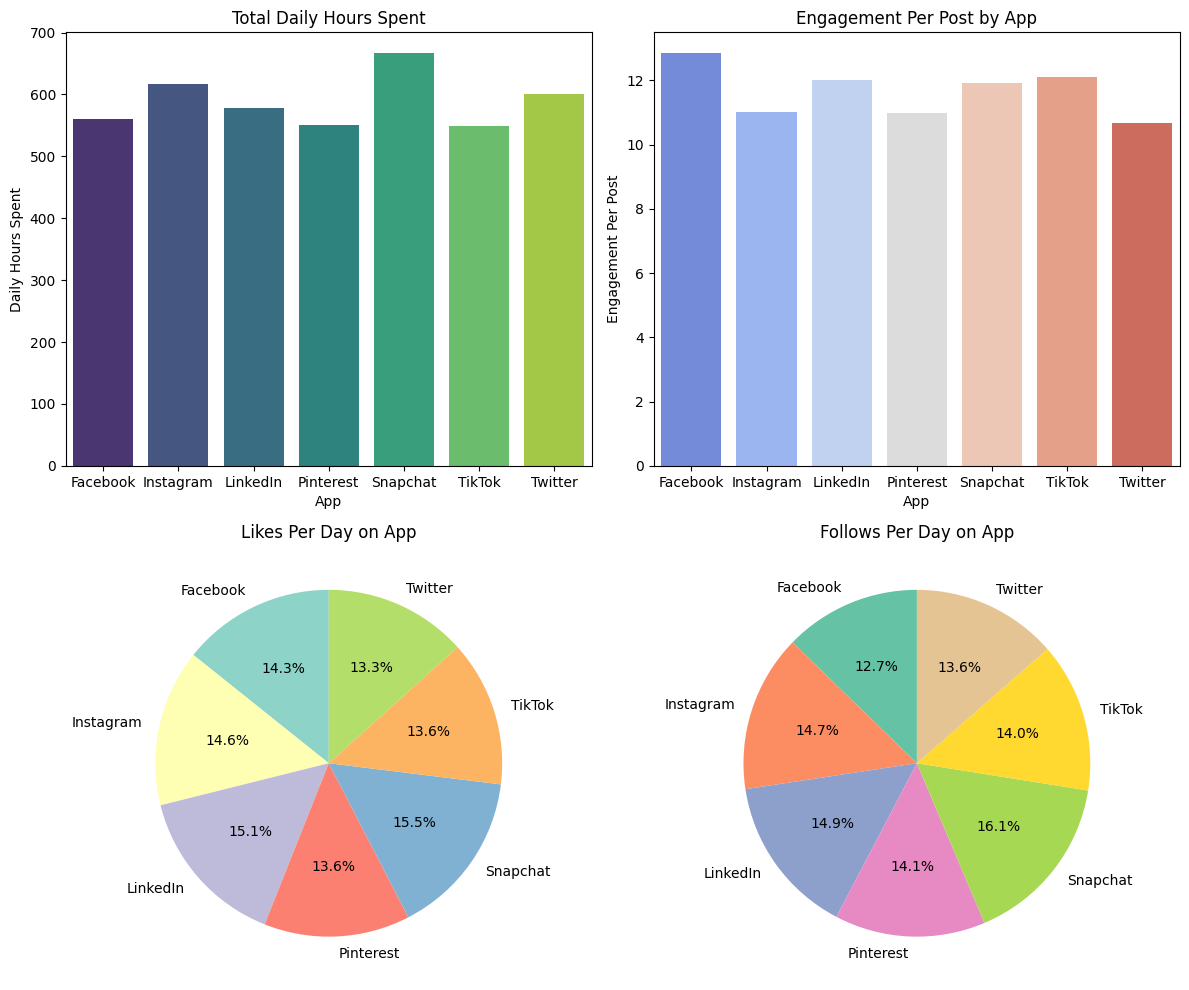

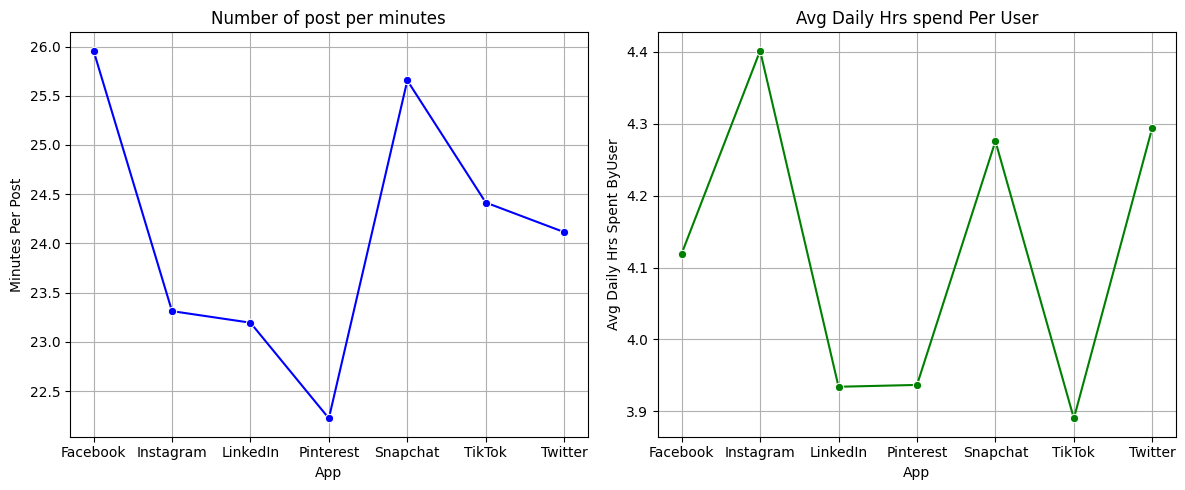

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=df.dropna()
df=df.drop_duplicates()
# Aggregate data at the App level
app_level_raw_analytics = df.groupby('App').agg({
    'User_ID': 'count',
    'Daily_Minutes_Spent': 'sum',
    'Posts_Per_Day': 'sum',
    'Likes_Per_Day': 'sum',
    'Follows_Per_Day': 'sum'
}).rename(columns={'User_ID': 'User_Count'}).reset_index()

print("Raw Data:")

display(app_level_raw_analytics)

# Add derived metrics
app_level_analytics = app_level_raw_analytics


app_level_analytics['Engagement_Per_Post'] = (
    (app_level_analytics['Likes_Per_Day'] + app_level_analytics['Follows_Per_Day'])
    / app_level_analytics['Posts_Per_Day']
)
app_level_analytics['Minutes_Per_Post'] = (
    app_level_analytics['Daily_Minutes_Spent'] / app_level_analytics['Posts_Per_Day']
)
app_level_analytics['Total_Daily_Hours_Spent'] = app_level_raw_analytics['Daily_Minutes_Spent'] / 60
app_level_analytics['Avg_Daily_Hrs_Spent_ByUser'] = (
    app_level_analytics['Daily_Minutes_Spent'] / (app_level_analytics['User_Count']*60)
)

# Display the app-level analytics
# print("App-Level Analytics:\n", app_level_analytics)
print("\nApp-Level Analytics:\n")
display(app_level_analytics)
# Set up a grid for side-by-side plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Total Daily Minutes Spent by App (Bar Chart)
sns.barplot(ax=axes[0, 0], x='App', y='Total_Daily_Hours_Spent', data=app_level_analytics, hue='App', palette='viridis', dodge=False)
axes[0, 0].set_title('Total Daily Hours Spent')
axes[0, 0].set_xlabel('App')
axes[0, 0].set_ylabel('Daily Hours Spent')
axes[0, 0].legend([], [], frameon=False)

# Engagement Per Post by App (Bar Chart)
sns.barplot(ax=axes[0, 1], x='App', y='Engagement_Per_Post', data=app_level_analytics, hue='App', palette='coolwarm', dodge=False)
axes[0, 1].set_title('Engagement Per Post by App')
axes[0, 1].set_xlabel('App')
axes[0, 1].set_ylabel('Engagement Per Post')
axes[0, 1].legend([], [], frameon=False)



# Proportion of Likes Per Day (Pie Chart)
axes[1, 0].pie(
    app_level_analytics['Likes_Per_Day'],
    labels=app_level_analytics['App'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set3', len(app_level_analytics))
)
axes[1, 0].set_title('Likes Per Day on App')

# Proportion of Follows Per Day (Pie Chart)
axes[1, 1].pie(
    app_level_analytics['Follows_Per_Day'],
    labels=app_level_analytics['App'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2', len(app_level_analytics))
)
axes[1, 1].set_title('Follows Per Day on App')


# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# Line Charts Side by Side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Line Chart for Daily Minutes Spent
sns.lineplot(ax=axes[0], x='App', y='Minutes_Per_Post', data=app_level_analytics, marker='o', color='blue')
axes[0].set_title('Number of post per minutes')
axes[0].set_xlabel('App')
axes[0].set_ylabel('Minutes Per Post')
axes[0].grid()

# Line Chart for Engagement Per Post
sns.lineplot(ax=axes[1], x='App', y='Avg_Daily_Hrs_Spent_ByUser', data=app_level_analytics, marker='o', color='green')
axes[1].set_title('Avg Daily Hrs spend Per User')
axes[1].set_xlabel('App')
axes[1].set_ylabel('Avg Daily Hrs Spent ByUser')
axes[1].grid()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()